In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
from sklearn.datasets import load_iris

#  Набор данных для распознавания ирисов

In [2]:
iris = load_iris()
for x in iris:
    print(x)

data
target
frame
target_names
DESCR
feature_names
filename
data_module


In [3]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris['target'].shape

(150,)

In [6]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [7]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
# Размер датасета - 150 строк, 5 колонок
data.shape

(150, 5)

In [9]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 150


In [10]:
# Список колонок
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [11]:
# Список колонок с типами данных
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object

In [12]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

sepal length (cm) - 0
sepal width (cm) - 0
petal length (cm) - 0
petal width (cm) - 0
target - 0


In [13]:
# Основные статистические характеристки набора данных
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
# Определим уникальные значения для целевого признака
data['target'].unique()

array([0., 1., 2.])

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

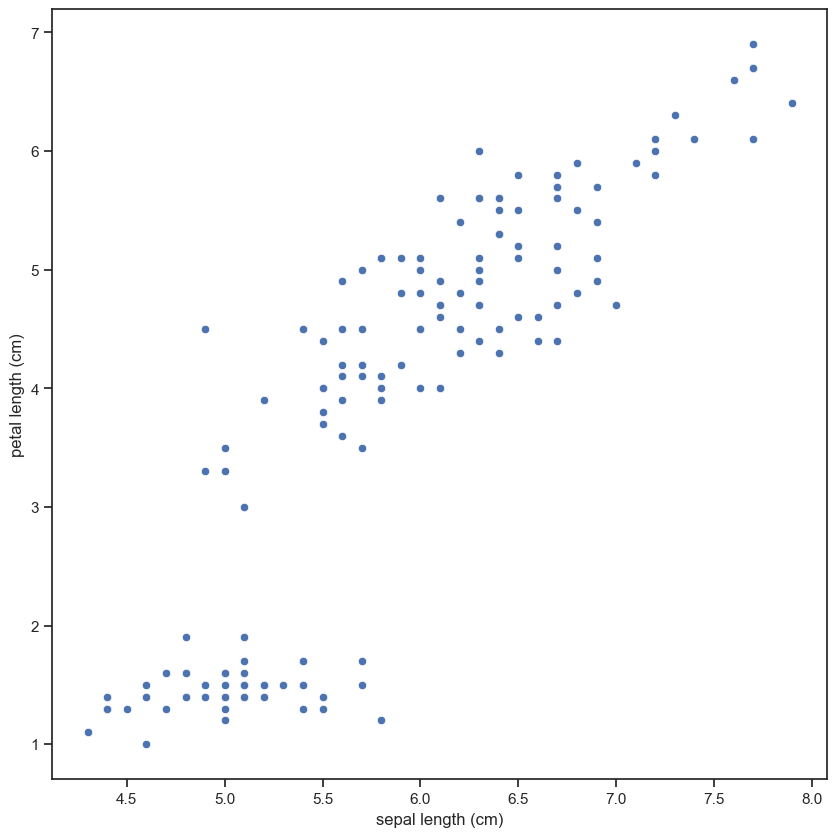

In [15]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='sepal length (cm)', y='petal length (cm)', data=data)

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

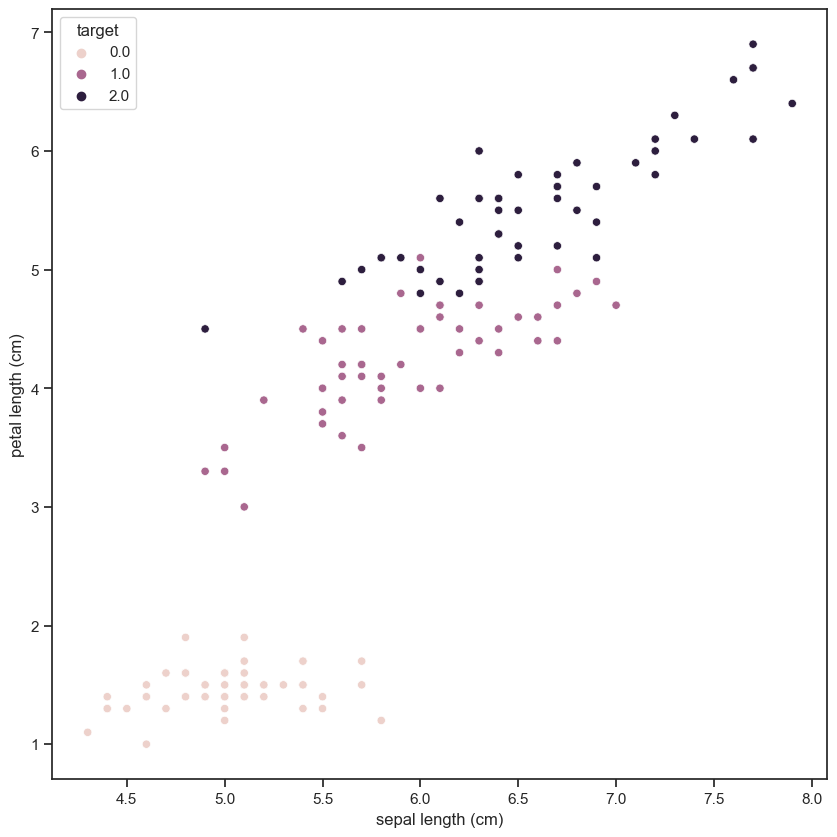

In [16]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='sepal length (cm)', y='petal length (cm)', data=data, hue='target')

<Axes: xlabel='sepal length (cm)', ylabel='Count'>

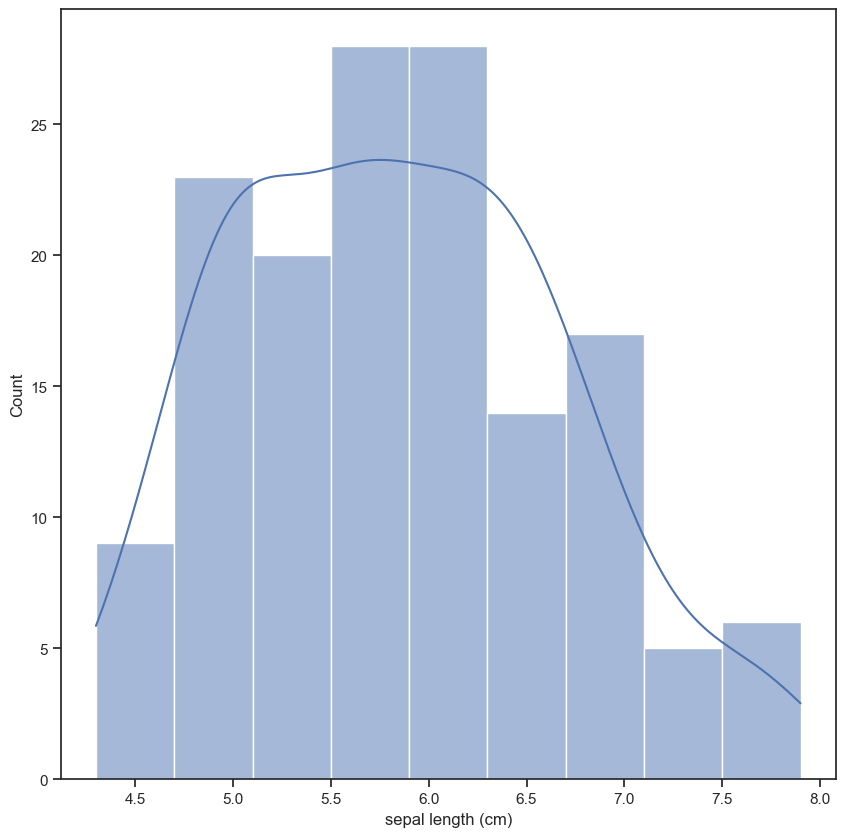

In [17]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.histplot(data['sepal length (cm)'], kde=True)

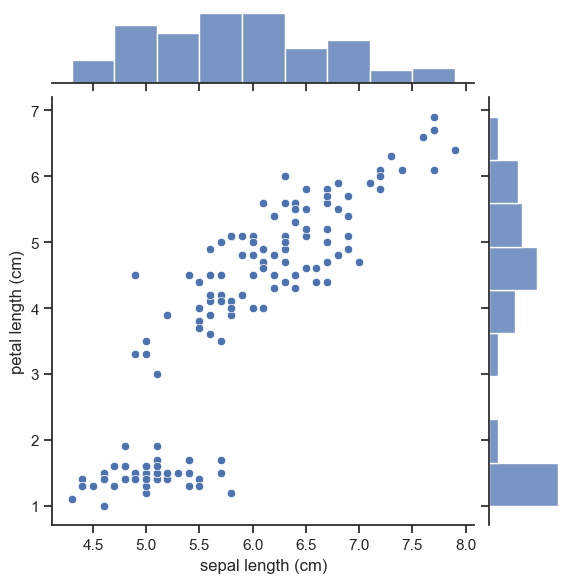

In [18]:
sns.jointplot(data=data, x='sepal length (cm)', y='petal length (cm)')

<Axes: xlabel='sepal length (cm)'>

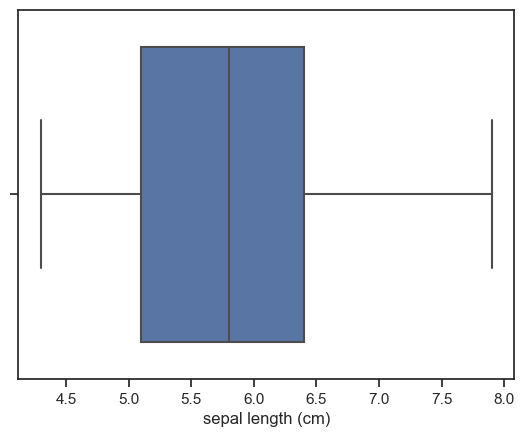

In [19]:
# По горизонтали
sns.boxplot(x=data['sepal length (cm)'])

<Axes: xlabel='target', ylabel='sepal length (cm)'>

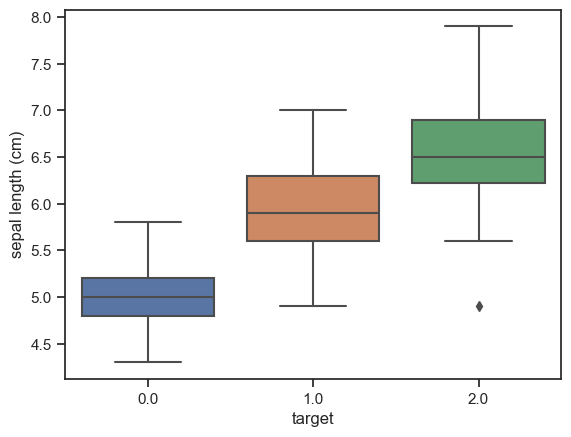

In [20]:
sns.boxplot(x='target', y='sepal length (cm)', data=data)

<Axes: xlabel='sepal length (cm)'>

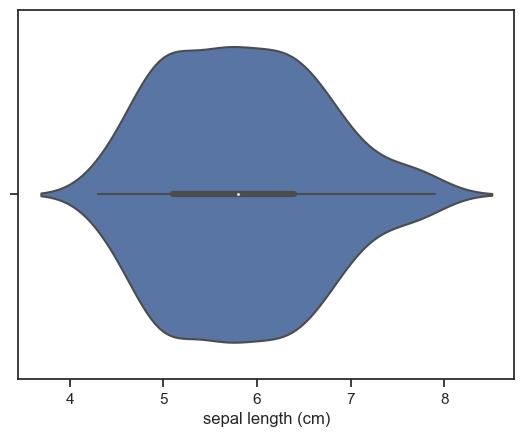

In [21]:
sns.violinplot(x=data['sepal length (cm)'])

<Axes: xlabel='target', ylabel='sepal length (cm)'>

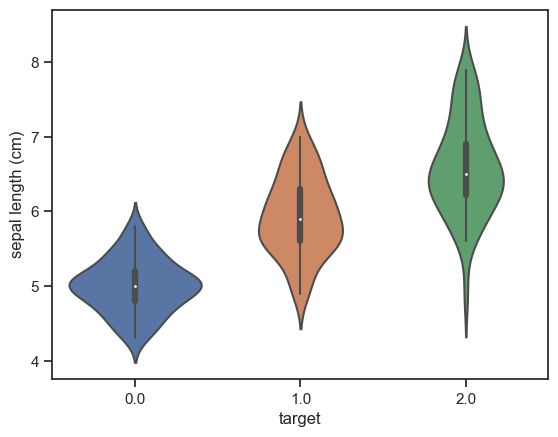

In [22]:
# Распределение параметра sepal length (cm) сгруппированные по target.
sns.violinplot(x='target', y='sepal length (cm)', data=data)

In [23]:
data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


На основе корреляционной матрицы можно сделать следующие выводы:

- Целевой признак наиболее сильно коррелирует с параметрами sepal length cm (0.78), petal length cm (0.949), petal width cm (0.956). Эти признаки обязательно следует оставить в модели.
- Целевой признак отчасти отрицательно коррелирует с sepal width (cm) (-0.427). Этот признак также стоит оставить в модели